# **Using Players' Age & Gameplay Hours to Predict Player Newsletter Subscriptions.**

## **Introduction**

In the world of gaming, understanding player behaviour is significant when it comes to both the assessment and improvement of video gaming platforms. Companies are interested in seeing what player characteristics predict their subscription towards game-related newsletters. As a group, we decided to explore the question: **Can an active player's age and gameplay hours predict their newsletter subscriptions?**.

According to Tarng et al. (2008), a case study performed on World of Warcraft players produced data that demonstrated how players' gameplay hours predicted long-term subscription towards the game. This highlighted how player engagement was an indicator towards subscription behaviour. 

We used the `players.csv`file collected from a Minecraft server hosted by a Comp Sci research group at UBC led by Frank Wood, whose goal is to analyze how players navigate video games. The `players.csv` file 
contained data of individuals' experience level (e.g, Beginner, Veteran, Pro), whether or not they were subscribed, age, hours played, and gender. We specifically narrowed our predictor variables based on age and played hours to determine its relationship with players' game-related newsletter subscriptions. We chose to focus on individuals who are active on the server, e.i. have a play time over 0 hours. This allows us to focus on predicting the behaviours of players who are actually using the server. The following are the columns from our data set used to create our model:


1. **subscribe**: whether or not a player is subscribed (class we want to predict)  
2. **played_hours**: player's total hours played (predictor variable)
3. **Age**: player's age (predictor variable)

From the list above, we are using `played_hours` and `Age`
as our main predictors, and subscribe as the variable we want to predict. 

# **Methods and Results**

## Data Cleaning and Wrangling

We first have to load the necessary packages and read in the data and make sure it is tidy. The first step will be to load tidyverse, tidymodels, repr and cowplot in so we can read our data set in, create visualizations and make our model. Now we load in the players.csv dataset, which we will load from GitHub so everyone in our group will be able to see it even though they have a different working directory. 

In [15]:
library(tidyverse) 
library(repr)
library(tidymodels)
library(cowplot)
URL<- "https://raw.githubusercontent.com/navis17/DSCI-100-Group-Project-Final-Report/refs/heads/main/players.csv" #this is the raw data from GitHub
players<-read_csv(URL)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Now that we have loaded our data in, the next step is to make sure the data is tidy. This data looks pretty tidy, but we are going to want to convert the subscribe column into a factor type variable since we are using it as the class we want to predict. This can be done using as_factor. We also want to remove any observations that contain NAs 

In [16]:
players_clean<- players|>
mutate(subscribe = as_factor(subscribe))
players_clean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Our classifier will be predicting wether or not an active player is subscribed to the game based newsletter based on player hours and age, so the next step would be to create a data table that only has the columns "subscribe", "played_hours" and "Age". This can be done using the select function. We also used the filter function to remove any observations in the played_hours column that were 0, e.i. "inactive" players, as we thought that data collected on users who actually use the server may be better suited to answer the research question. We also removed any observations in the Age column that were NAs as we will not want to use those observations in our classifier. 

In [17]:
players_select<- players_clean |>
filter(!played_hours == 0, !Age == "NA") |> 
select(subscribe, played_hours, Age) 
players_select





subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.1,17
TRUE,1.6,23
TRUE,1.5,25
TRUE,0.2,22
TRUE,48.4,17


Before we create our classifier, it might be useful to visualize the data to see if we can find any trends that show a relationship between played hours and age, and how they might affect subscription status. Using a scatter plot and coloring by subscription status will be the best way to see a trend. 

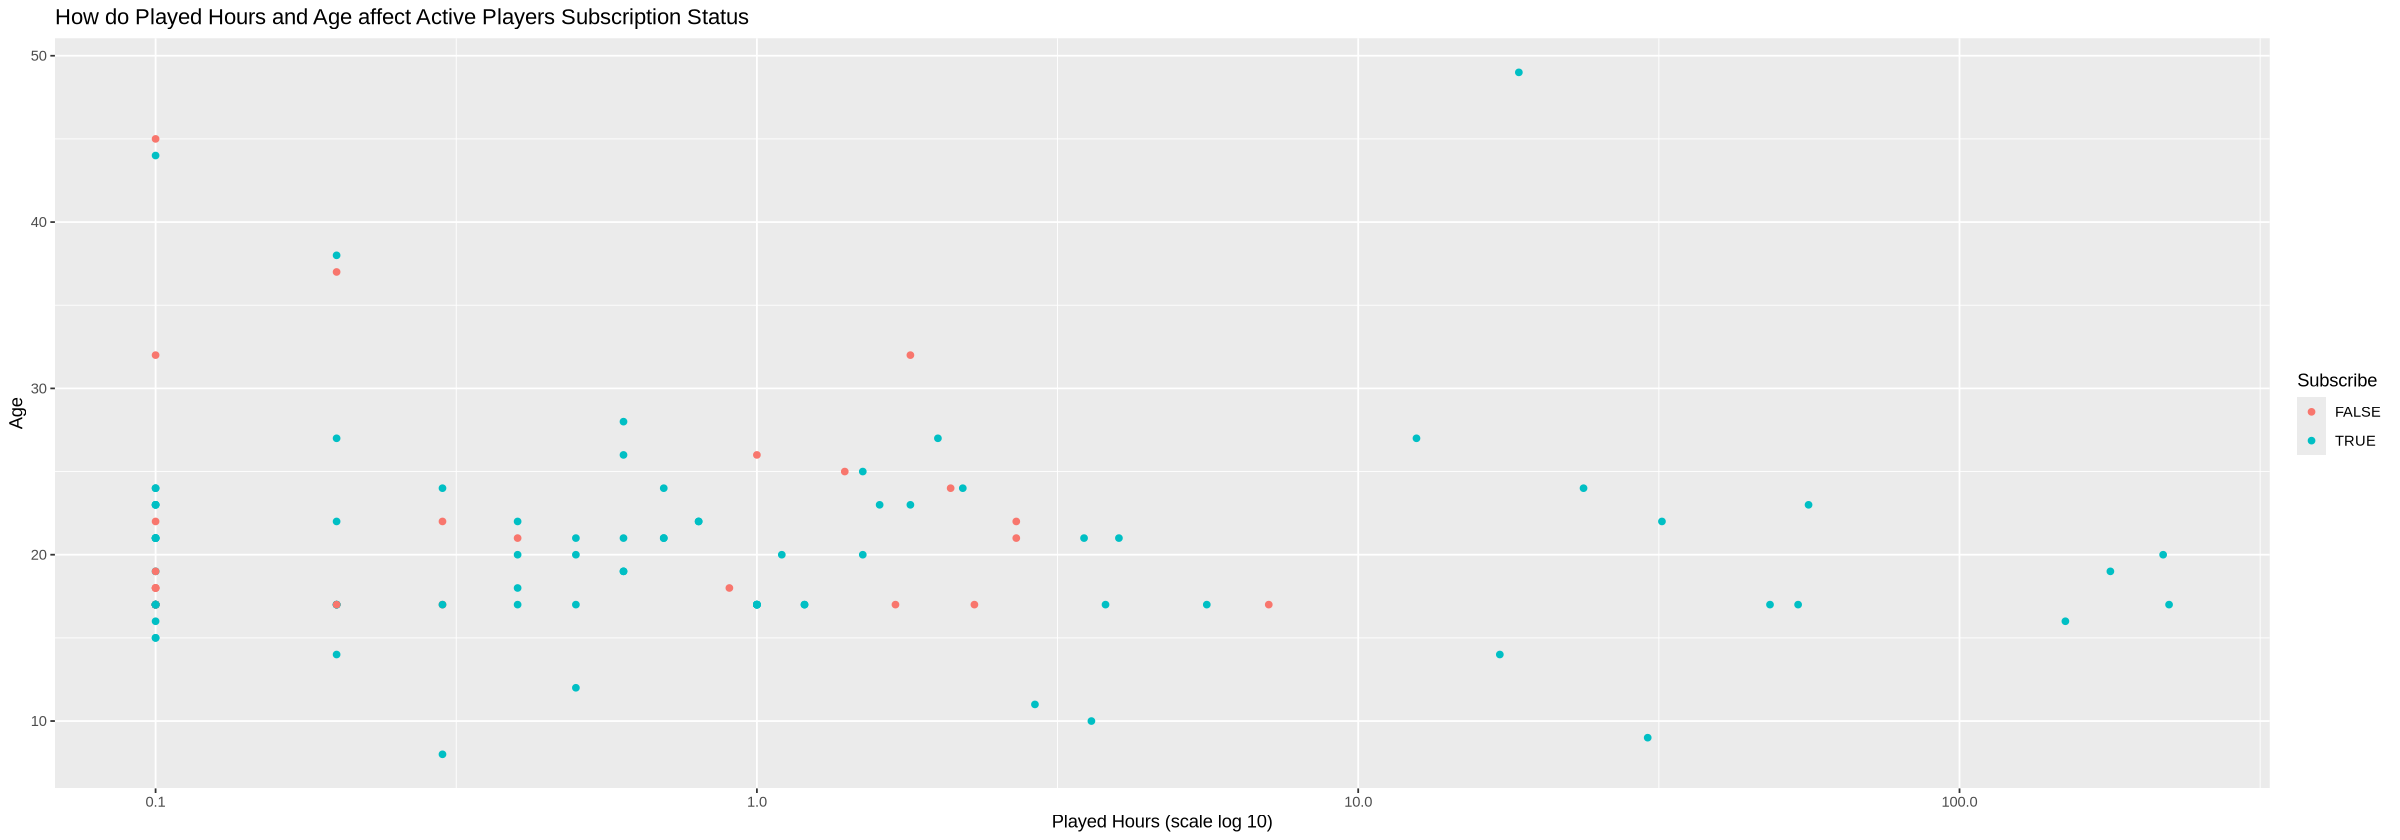

In [18]:
players_plot<- players_select |>
ggplot(aes(x = played_hours, y = Age, color = subscribe)) + scale_x_log10() +
geom_point() +
labs(x = "Played Hours (scale log 10)", y = "Age", color = "Subscribe") +
ggtitle("How do Played Hours and Age affect Active Players Subscription Status")
players_plot

Based on the data above, there it does not look to be a very strong correlation between player age, played hours and wether they are subscribed to the newsletter or not. There is a weak trend where it looks like players who spend more time on the server are more likely to be subscribed to the game related newsletter, and players who are younger are also more likely to be subscribed. The played_hours variable was 10 log scaled, as there were some players who played 200+ hours and when this data was plotted without scaling there was a lot of data clumping because the x axis was too spread out. 


Now that we have tidied our data, wrangled it and created some visualizations, we can start creating our classifier that will aim to predict wether a player is subscribed to a game related magazine based on their age and played hours. 

## **Creating the Model**

### Exploring data 

Now that we have processed our data, we can start to create a classifier model. The first thing we can do is explore our data a bit more. We wanted to see what percentage of players subscribed to the game related newsletter, and we can do this by using group_by and summarize. 

In [19]:
num_obs<- nrow(players_select)
players_percentage<- players_select |>
group_by(subscribe) |>
summarize(Count = n(), Percentage = n() / num_obs * 100)
players_percentage

subscribe,Count,Percentage
<fct>,<int>,<dbl>
FALSE,25,22.93578
TRUE,84,77.06422


Now we can see that majority of the players (77%) who played > 0 hours on the server are subscribed to the game related newsletter.

### Creating Testing and Training sets

Our first step is going to be setting a seed, so the data selection to make training and testing sets is reproducable. We will be scaling and using the training data to create our classifier, and we will use the test data to test our model. Setting a seed will let us be able to reproduce the random selection that R performed when splitting the data. Once we set the seed, we can split our data into training and testing sets. We are going to use 75% of our data in our training set, and the other 25% will be used for the test set. We chose to use 75 % of the data for the training set because the more data we use for our training set the higher our model accuracy will be, however we must be sure to use enough of our data for testing, so we can collect metrics about the accuracy, recall and precision of our model. 

Next, we create a recipe for our model which we can add to our workflow later. We specify that we are using "played_hours" and "Age" as our predictor variables and that we want to predict the subscription status of players.

### Finding the Best K value

In order to create a good model, we want to choose the best k value possible. We can do this by putting tune() in the neighbors argument when we use the nearest neighbor function. We also add which engine we want to use, and what model we want to use which is classification. Now we perform cross validation on our data using the vfold function, our vfold will be used to find the value of k that gives us the highest accuracy. We now want to create a tibble of possible k values we want to test, and put all of this information in a workflow. Here we will add our recipe, our model, and then we are going to use the tune_grid() and the collect_metrics() function to look at the accuracy different values of K provide. 

 We can use filter() to specifically look at the .metric accuracy. We then use arrange() and desc() to find the k value with the highest mean, which will correspond to the best value of k to use for our model. 

In [20]:
set.seed(1) 
players_split<-initial_split(players_select, prop = 0.75, strata = subscribe) 
players_train<- training(players_split) 
players_test<- testing(players_split)


players_recipe<- recipe(subscribe~ Age, played_hours, data = players_train) |>
step_scale(all_predictors()) |>
step_center(all_predictors())


players_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("classification")

players_fold<- vfold_cv(players_train, v = 5, strata = subscribe)

k_value<- tibble(neighbors = seq(from = 1, to = 30, by = 1))

best_k<- workflow() |>
add_recipe(players_recipe) |>
add_model(players_spec) |>
tune_grid(resamples = players_fold, grid = k_value) |>
collect_metrics()


players_accuracies<- best_k |>
filter(.metric == "accuracy")
players_accuracies


k_value<- players_accuracies |>
arrange(desc(mean)) |>
head(1) |>
pull(neighbors)
k_value
 



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4721569,5,0.043308040,Preprocessor1_Model01
2,accuracy,binary,0.4721569,5,0.043308040,Preprocessor1_Model02
3,accuracy,binary,0.6329412,5,0.047378003,Preprocessor1_Model03
4,accuracy,binary,0.6329412,5,0.047378003,Preprocessor1_Model04
5,accuracy,binary,0.5976471,5,0.046937753,Preprocessor1_Model05
6,accuracy,binary,0.5976471,5,0.046937753,Preprocessor1_Model06
7,accuracy,binary,0.5976471,5,0.053807008,Preprocessor1_Model07
8,accuracy,binary,0.5858824,5,0.055578465,Preprocessor1_Model08
9,accuracy,binary,0.5976471,5,0.065416185,Preprocessor1_Model09


[1] 13

Now we know that k = 13 is going to be the best number for our k nearest neighbors model. We can graph the changes in the mean with increasing or decreasing k values to look at how the value of k will affect the accuracy of the model.

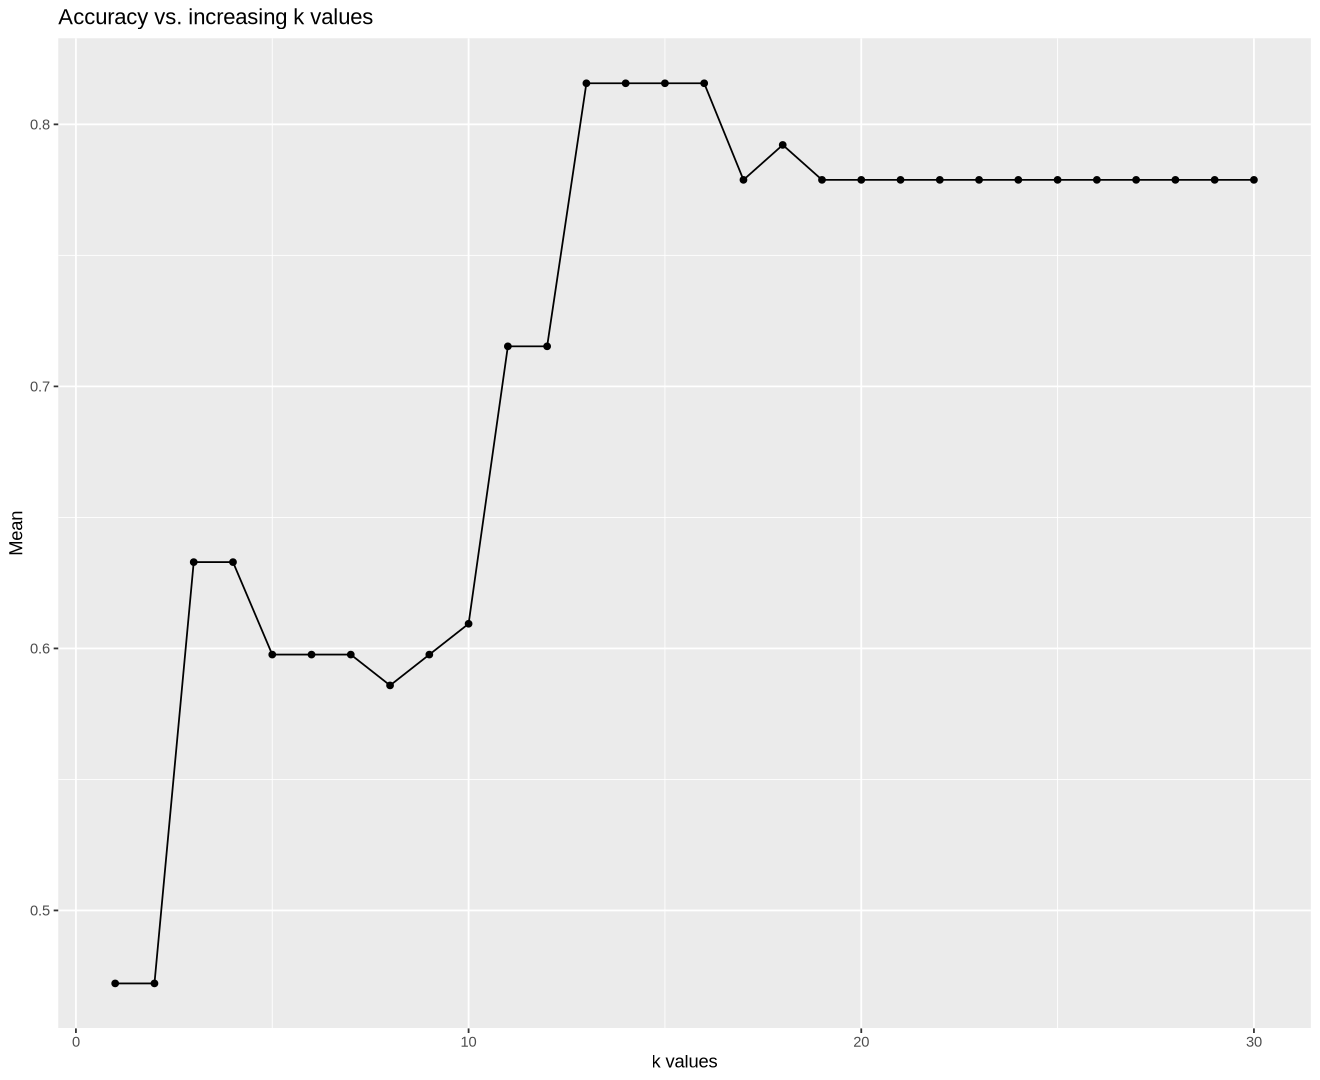

In [21]:
options(repr.plot.width = 11, repr.plot.height = 9)
k_plot<- players_accuracies |>
ggplot(aes(x = neighbors, y = mean)) + 
geom_point() + geom_line() +
labs(x = "k values", y = "Mean") +
ggtitle("Accuracy vs. increasing k values") 
k_plot


Now that we know what the best value of k is, we can create our classifier model. The first thing we want to do is create a new spec, where the k value is 13. 

We then create a workflow, where we can use the recipe we created earlier. Finally, we use the predict() function to test our classifier on our test data.  Now that we have tested our classifier, we should collect the metrics of our classifier to see how well it performed. 

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
TRUE,TRUE,0.7,21
TRUE,TRUE,0.1,21
FALSE,TRUE,0.1,17
TRUE,TRUE,0.2,22
FALSE,TRUE,0.5,17
TRUE,TRUE,0.6,28
TRUE,TRUE,0.6,26
TRUE,FALSE,1.4,25
FALSE,TRUE,0.1,17


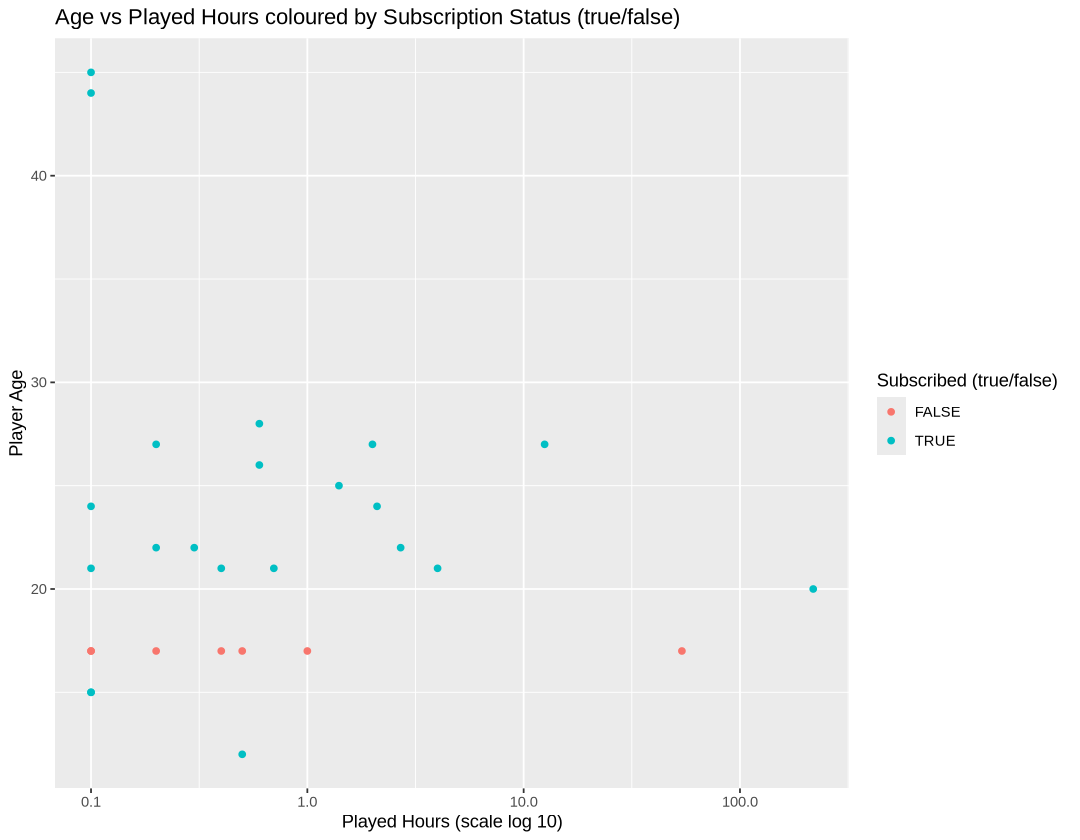

In [22]:
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
    set_engine("kknn") |>
    set_mode("classification")

final_workflow <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(final_spec) |>
    fit(data = players_train)


predictions<- predict(final_workflow, players_test) |>
bind_cols(players_test)
predictions

options(repr.plot.width = 9, repr.plot.height = 7)

predictions_plot<- ggplot(predictions, aes(x = played_hours, y = Age, color = .pred_class)) +
geom_point() +
labs(x = "Played Hours (scale log 10)", y = "Player Age", color = "Subscribed (true/false)") +
scale_x_log10() +
ggtitle("Age vs Played Hours coloured by Subscription Status (true/false)") 
predictions_plot




## Analyzing Classifier Performance

It looks like the classifier predicted majority of the observations as being subscribed to the newsletter. The correlation between age and played hours was weak, so the classifier might have a difficult time trying to predict the class of the test data. To know how our model really performed, we can run some tests to find our the classifiers accuracy, precision and recall.

We are first going to find the accuracy, recall and precision. 

In [23]:
predictions_accuracy<- predictions |>
metrics(truth = subscribe, estimate = .pred_class) |>
filter(.metric == "accuracy")
predictions_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5714286


The model is only guessing the correct class 57 percent of the time, which is very low. We will test the precision and recall next. But before we can test the precision and recall, we have to find out what order of our class is. We will treat a subscription status of "true" as the positive class.

In [24]:
predictions |>
pull(subscribe) |>
levels()

[1] "FALSE" "TRUE"

In [25]:
predictions_precision<- predictions |>
precision(truth = subscribe, estimate = .pred_class, event_level = "second") |>
filter(.metric == "precision")
predictions_precision


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7142857


The classifier has a precision of 0.71, which is the number of correct positive predictions / total number of positive predictions made. This means that when the model classified the observation as true, it was right 71 % of the time. Typically, when we have a high precision, it means the model tends to guess the class as negative, which in this case is "not subscribed".

Now we can find the recall. The recall is the number of correct positive predictions / number of positive predictions in the data set. This is different from the precision, because we are seeing if the model was able predict the observations that were true as true. Typocally when there is a high recall, the model tends predict more observations as positive, or "subscribed".  

In [26]:
predictions_recall<- predictions |>
recall(truth = subscribe, estimate = .pred_class, event_level = "second") 
predictions_recall

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.7142857


Interestingly, the recall and precision are the same value. Combined with the low accuracy, it most likely means that our classifier is guessing a lot of false negatives and false positives. It has a higher precision because our model predicted false negatives, so it was less likely the model incorrectly guessed a false positive, but at the same time our recall is high so our model also guessed a lot of false positives to "catch" the actual positive classes. 

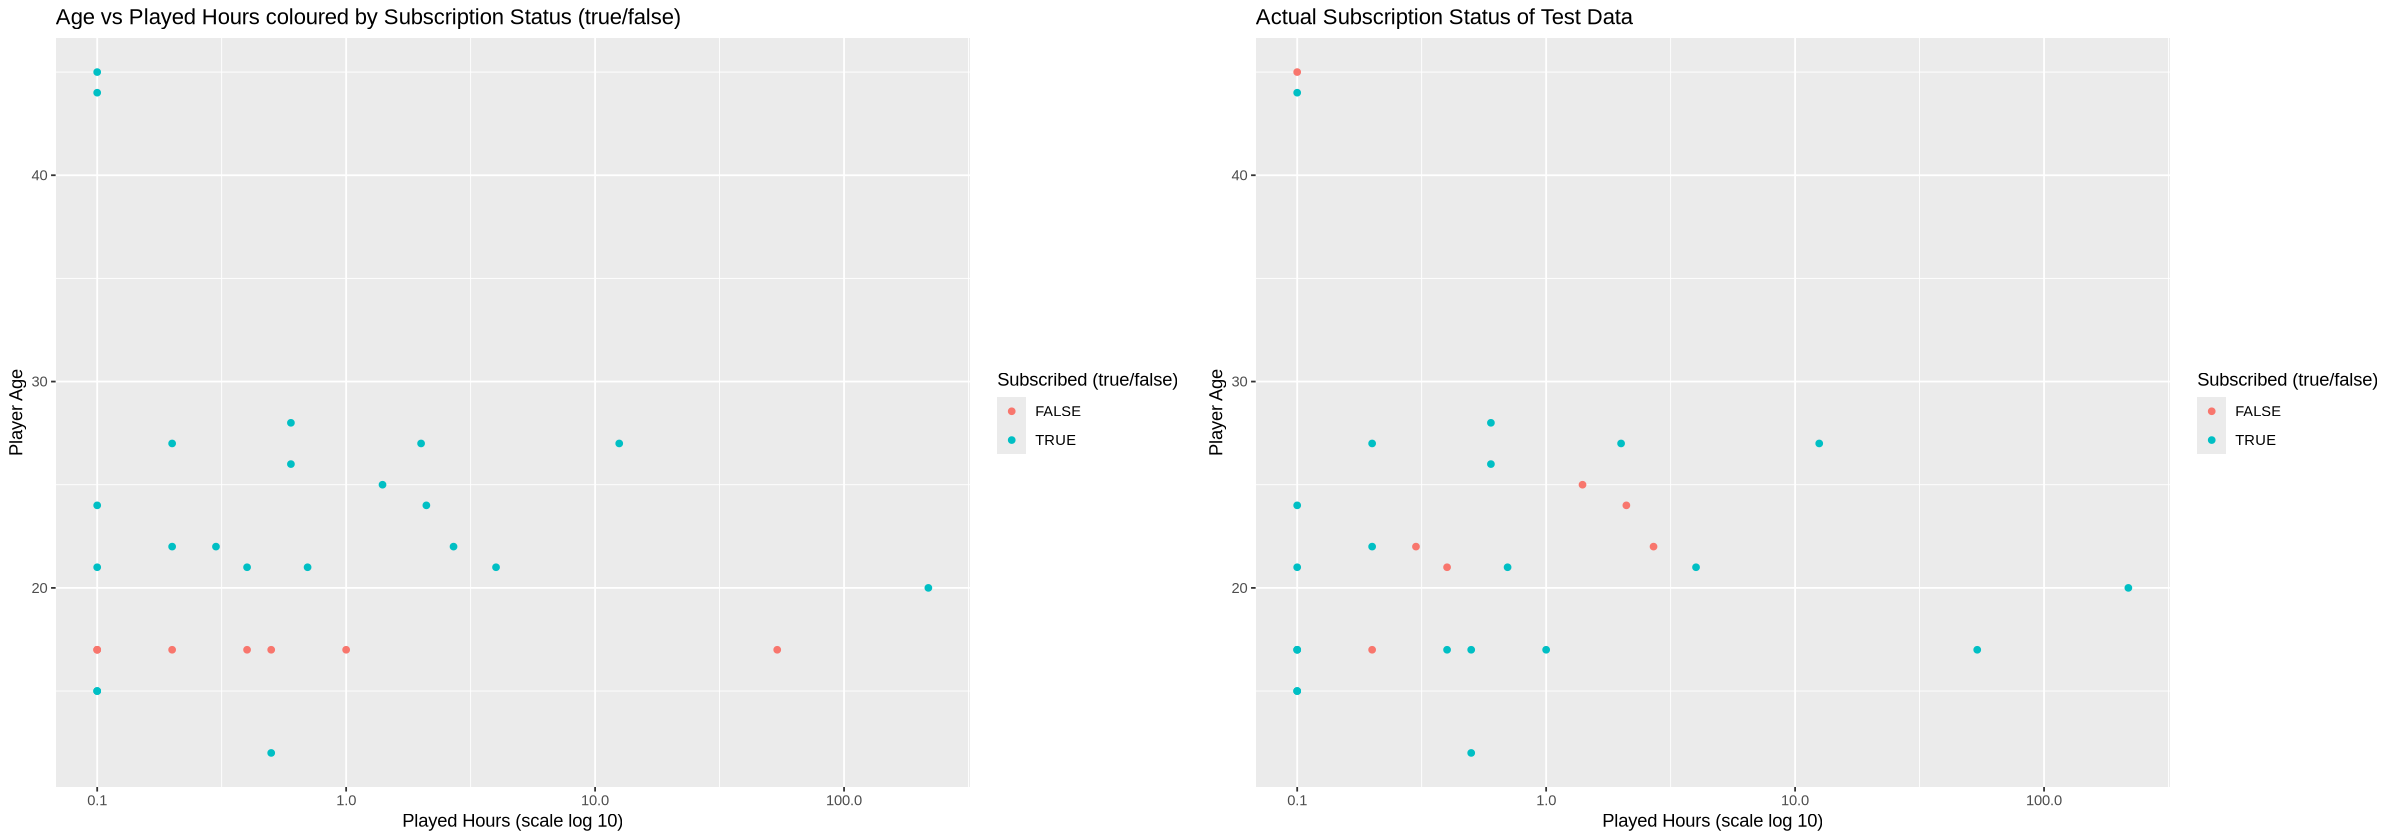

In [27]:

options(repr.plot.width = 20, repr.plot.height = 7) 

true_test_plot<- players_test |>
ggplot(aes(x = played_hours, y = Age, color = subscribe)) +
geom_point() + scale_x_log10() +
labs(x = "Played Hours (scale log 10)", y = "Player Age", color = "Subscribed (true/false)")+
ggtitle("Actual Subscription Status of Test Data")



plot_grid(predictions_plot, true_test_plot)


It looks like our classifier had 6 false positive and 5 false negatives. This makes sense given our precision and accuracy. Now that we have this data, we can discuss what it means. 

## **Discussion**

Based on our analysis, our model was found to not be effective in accurately predicting the subscription class of players based on age and played hours. The model accuracy was a very low 57%, and the precision and recall were both 71%. This means that our model made a lot of incorrect predictions, and is therefore not suitable to predict subscription status based on our predictor variables. 

We believe that the reason our classifier did not work is the correlation between the predicitive variables and subscription status observed in the original data is not strong enough to make a classifier with. The classifier needs to have a pattern it can use to predict the class of test data, and the pattern we did observe in the original data was very weak. Even though our classifier does not work, we were able to gain useful information. 

Our research question asked "Can an active player's age and gameplay hours predict their newsletter subscriptions?", and based on the analysis of the original data and our classifier, it is unlikely that age and gameplay hours can predict active players subscription status. This is still valuable data, as the research group wanted to learn which behaviours and characteristics can predict a players subscription status, and now they know that age and played hours likely do not have an effect. This leads to more questions about what behaviours can predict subscription status. There are other potential predictor variables in this data set, such as player experience, and we wonder if player experience is a characteristic that can, in fact, predict subscription status.  

## **Citations**

*Evidently AI Team. (2025, January 9). Accuracy vs. precision vs. recall in machine learning: What’s the difference? Evidently AI - Open-Source ML Monitoring and Observability. https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall*

*Timbers, T., Campbell, T., & Lee, M. (2024, August 21). Data Science: A First Introduction. Data Science Book. https://datasciencebook.ca/index.html*

Tarng, P.-Y., Chen, K.-T., & Huang, P. (2008). An analysis of WoW players’ game hours. Proceedings of the 7th ACM SIGCOMM Workshop on Network and System Support for Games - NetGames ’08. https://doi.org/10.1145/1517494.1517504